In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical
import tensorflow as tf

Using TensorFlow backend.


In [4]:
batch_size = 128
num_classes = 10 #Son 10 clases numero de 0 a 9
epochs = 12 
img_rows = 28 #tamaño de la imagen
img_cols = 28 #tamaño de la imagen
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

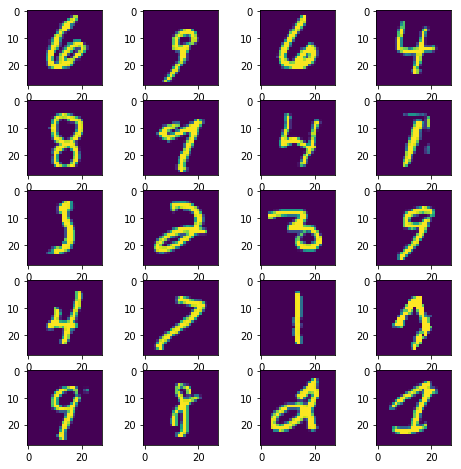

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
w =10
h =10
fig=plt.figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img_indx = np.random.randint(1 , 500)
    fig.add_subplot(rows, columns,i)
    plt.imshow(x_train[img_indx])
plt.show()

In [ ]:
y_train =to_categorical(y_train)#tranformamos el array de labels de [7] a [0,0,0,0,0,0,1,0,0,0]
y_test = to_categorical(y_test)

In [ ]:
if K.image_data_format() == 'channels_first':# si es modo de entrada de los datos es 'channels_first' van de forma: input_shape=(channels, rows, cols)
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape = (1, img_rows, img_cols)
else:# si es modo de entrada de los datos es 'channels_last' van de forma: input_shape=(rows, cols, channels)
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
# Implemetaremos un callback para que se detengan las iteraciones cuando tengamos un score mayor a 99%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print('\nLimite de 99% superado, se detuvo el training!')
            self.model.stop_training =True

In [8]:
callbacks = myCallback()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.adam(), metrics=['accuracy'])


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test), callbacks = [callbacks])


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2488 - acc: 0.9255 - val_loss: 0.0509 - val_acc: 0.9836
Epoch 2/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0845 - acc: 0.9750 - val_loss: 0.0379 - val_acc: 0.9880
Epoch 3/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0642 - acc: 0.9800 - val_loss: 0.0339 - val_acc: 0.9888
Epoch 4/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0538 - acc: 0.9834 - val_loss: 0.0296 - val_acc: 0.9907
Epoch 5/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0444 - acc: 0.9861 - val_loss: 0.0295 - val_acc: 0.9897
Epoch 6/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0376 - acc: 0.9884 - val_loss: 0.0295 - val_acc: 0.9910
Epoch 7/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027679694776193173
Test accuracy: 0.9913


In [13]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")